In [1]:
from bs4 import BeautifulSoup
import re
import requests

In [3]:
!pip install nytimesarticle

  Running setup.py bdist_wheel for nytimesarticle ... done
  Stored in directory: /Users/matthew.mitchell/Library/Caches/pip/wheels/88/92/0f/d441bf1ccfcc3f98219f9d2f1c2277ccbe3521e35101f36229
Successfully built nytimesarticle
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from nytimesarticle import articleAPI
api = articleAPI('73df8be716f64090956ecd26ac85fe24')

In [14]:
type(api)

nytimesarticle.articleAPI

In [ ]:
api.

In [19]:
api.search?

In [24]:
articles = api.search( 
     "fq = {'source':['The New York Times']}")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [15]:
type(articles)

dict

In [16]:
len(articles)

3

In [17]:
articles.keys()

dict_keys(['status', 'copyright', 'errors'])

In [18]:
articles['status']

'ERROR'

In [11]:
def parse_articles(articles):
    '''
    This function takes in a response to the NYT api and parses
    the articles into a list of dictionaries
    '''
    news = []
    for i in articles['response']['docs']:
        dic = {}
        dic['id'] = i['_id']
        if i['abstract'] is not None:
            dic['abstract'] = i['abstract'].encode("utf8")
        dic['headline'] = i['headline']['main'].encode("utf8")
        dic['desk'] = i['news_desk']
        dic['date'] = i['pub_date'][0:10] # cutting time of day.
        dic['section'] = i['section_name']
        if i['snippet'] is not None:
            dic['snippet'] = i['snippet'].encode("utf8")
        dic['source'] = i['source']
        dic['type'] = i['type_of_material']
        dic['url'] = i['web_url']
        dic['word_count'] = i['word_count']
        # locations
        locations = []
        for x in range(0,len(i['keywords'])):
            if 'glocations' in i['keywords'][x]['name']:
                locations.append(i['keywords'][x]['value'])
        dic['locations'] = locations
        # subject
        subjects = []
        for x in range(0,len(i['keywords'])):
            if 'subject' in i['keywords'][x]['name']:
                subjects.append(i['keywords'][x]['value'])
        dic['subjects'] = subjects   
        news.append(dic)
    return(news) 

In [12]:
parsed = parse_articles(articles)

KeyError: 'response'

In [13]:
for article in parsed:
    try:
        copy = article
        copy['text'] = scrape_full_article_text(article['url'])
        article_dict[article['url']] = copy
    except:
        continue

NameError: name 'parsed' is not defined

In [157]:
print len(article_dict.keys())

469


In [27]:
def scrape_full_article_text(url):
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, 'html.parser')
    paragraphs = soup.find_all('p', attrs={'class': 'story-body-text'})
    full_text=str()
    for paragraph in paragraphs:
        raw_paragraph = paragraph.contents
        cleaned_paragraph=str()
        for piece in raw_paragraph:
            if piece.string:
                cleaned_paragraph += piece.string
                cleaned_paragraph = cleaned_paragraph.replace(r"<.*?>","")
                cleaned_paragraph = cleaned_paragraph.encode('ascii','ignore')
        full_text += cleaned_paragraph
    return full_text

##Fully Automated Scrape of 500 articles (50 pages worth)

In [156]:
for i in range(3,51):
    articles = api.search( 
         fq = {'source':['The New York Times']}, 
         begin_date = 20111231, page=i )

    parsed = parse_articles(articles)

    for article in parsed:
        try:
            copy = article
            copy['text'] = scrape_full_article_text(article['url'])
            article_dict[article['url']] = copy
        except:
            print article, "text extraction failed"
            continue

In [159]:
print len(article_dict.keys())

678


In [160]:
import pickle

In [161]:
pwd

u'/Users/matthewmitchell/Desktop/Metis'

In [162]:
with open('my_NYTimes_data.pkl', 'w') as picklefile:
    pickle.dump(article_dict, picklefile)

In [163]:
ls

Blog/                         D3/                           Project4_Elections/           ipynb_checkpoints/            scatterplot_demo.html
CSS_Test/                     Flask_App.py                  Wow_Orange.css                my_NYTimes_data.pkl           scatterplot_demo.js
Cereal.csv                    Investigations/               bostock_us_counties.json      nyc16_ds8_old/
Challenges/                   NY_TIMES_API.ipynb            index.html                    nyc16_ds8_old2/
Classroom_Practice/           Pair_Programming/             interactive_scatter_data.csv  paulMurray.html


In [170]:
import pandas as pd

In [232]:
ny_times_df = pd.DataFrame.from_dict(article_dict, orient='index')
ny_times_df.head()

,headline,text,section,locations,word_count,snippet,source,subjects,url,desk,date,type,id,abstract
http://6thfloor.blogs.nytimes.com/2014/07/25/under-cover-math-problems/,Under Cover: Math Problems,AdvertisementElizabeth Green’s cover story thi...,Magazine,[New York City],352,Andrew B. Myers used simple visuals to illustr...,The New York Times,"[Photography, Mathematics]",http://6thfloor.blogs.nytimes.com/2014/07/25/u...,Magazine,2014-07-25,Blog,53d2cf0e38f0d8165c6403e5,Andrew B. Myers used simple visuals to illustr...
http://6thfloor.blogs.nytimes.com/2014/07/28/behind-the-cover-story-elizabeth-green-on-americas-math-crisis/,Behind the Cover Story: Elizabeth Green on Ame...,"Advertisement\nElizabeth Green, a co-founder a...",Magazine,"[Japan, United States]",1226,"Elizabeth Green, a co-founder and the chief ex...",The New York Times,"[Mathematics, Education (K-12)]",http://6thfloor.blogs.nytimes.com/2014/07/28/b...,Magazine,2014-07-28,Blog,53d6a95138f0d81dba3df262,"Elizabeth Green, a co-founder and the chief ex..."
http://afterdeadline.blogs.nytimes.com/2014/09/23/do-the-math/,Do the Math,"AdvertisementLike names and dates, numbers are...",None,[],1636,Numbers are among the most basic facts we repo...,The New York Times,[],http://afterdeadline.blogs.nytimes.com/2014/09...,None,2014-09-23,Blog,5421612a38f0d81f7a601651,Numbers are among the most basic facts we repo...
http://bits.blogs.nytimes.com/2012/03/22/todays-scuttlebot-apple-buyback-math-and-pictures-of-desolation/,Today's Scuttlebot: Apple Buyback Math and Pic...,,Technology,[],217,The technology reporters and editors of The Ne...,The New York Times,[],http://bits.blogs.nytimes.com/2012/03/22/today...,None,2012-03-22,Blog,4fd3a3678eb7c8105d8ec9b1,The technology reporters and editors of The Ne...
http://bits.blogs.nytimes.com/2013/03/07/todays-scuttlebot-cartoon-math-and-tablet-traffic/,Today's Scuttlebot: Cartoon Math and Tablet Tr...,,Technology,[],112,The technology reporters and editors of The Ne...,The New York Times,[],http://bits.blogs.nytimes.com/2013/03/07/today...,None,2013-03-07,Blog,513917eccf28d04ae0000386,The technology reporters and editors of The Ne...


127 Have text extraction missing
551 Successfully scraped

In [202]:
print len(ny_times_df[ny_times_df.text==''])
print len(ny_times_df[ny_times_df.text!=''])

127
551


In [183]:
copy['url']

u'http://www.nytimes.com/2016/08/12/movies/hell-or-high-water-review.html'

##Articles Matching the Search "Math"; first 50 pages of hits

In [284]:
success=0
errors=0
for i in range(51):
    articles = api.search( q='Math',
         fq = {'source':['The New York Times']}, 
         begin_date = 20111231, page=i )

    parsed = parse_articles(articles)

    for article in parsed:
        try:
            copy = article
            copy['text'] = scrape_full_article_text(article['url'])
            article_dict[article['url']] = copy
            success += 1
            print 'Article', article['url'], 'parsed'
        except:
            print 'Article', article['url'], 'text parsing error'
            errors += 1
            continue

Article http://wordplay.blogs.nytimes.com/2016/07/04/finkel-america/ parsed
Article http://www.nytimes.com/2016/07/29/science/brain-scans-math.html parsed
Article http://www.nytimes.com/2015/05/27/dining/bedtime-math-founder-laura-overdeck-eggbeater.html parsed
Article http://opinionator.blogs.nytimes.com/2012/10/01/its-my-birthday-too-yeah/ parsed
Article http://opinionator.blogs.nytimes.com/2012/09/10/singular-sensations/ parsed
Article http://wordplay.blogs.nytimes.com/2016/07/18/imo-2016/ parsed
Article http://opinionator.blogs.nytimes.com/2012/09/17/friends-you-can-count-on/ parsed
Article http://opinionator.blogs.nytimes.com/2012/09/24/proportion-control/ parsed
Article http://www.nytimes.com/2014/09/02/science/science-and-math-scores-school.html parsed
Article http://wordplay.blogs.nytimes.com/2015/03/30/chartier/ parsed
Article http://www.nytimes.com/2015/10/22/opinion/math-for-fun.html parsed
Article http://www.nytimes.com/2016/04/21/upshot/how-donald-trump-could-win-the-nomin

In [285]:
ny_times_df = pd.DataFrame.from_dict(article_dict, orient='index')
print len(ny_times_df[ny_times_df.text==''])
print len(ny_times_df[ny_times_df.text!=''])

155
1016


In [288]:
len(ny_times_df)

1171

In [289]:
pwd

u'/Users/matthewmitchell/Desktop/Metis'

In [290]:
with open('my_NYTimes_data1171.pkl', 'w') as picklefile:
    pickle.dump(article_dict, picklefile)

In [3]:
with open("my_NYTimes_data1171.pkl", 'r') as picklefile: 
    my_old_data = pickle.load(picklefile)

In [8]:
old_df = pd.DataFrame.from_dict(my_old_data, orient='index')

In [18]:
old_df.head(2)

,headline,text,abstract,locations,word_count,id,snippet,source,subjects,url,desk,date,type,section
http://6thfloor.blogs.nytimes.com/2014/07/25/under-cover-math-problems/,Under Cover: Math Problems,Elizabeth Greens cover story this week about t...,Andrew B. Myers used simple visuals to illustr...,[New York City],352,53d2cf0e38f0d8165c6403e5,Andrew B. Myers used simple visuals to illustr...,The New York Times,"[Photography, Mathematics]",http://6thfloor.blogs.nytimes.com/2014/07/25/u...,Magazine,2014-07-25,Blog,Magazine
http://6thfloor.blogs.nytimes.com/2014/07/28/behind-the-cover-story-elizabeth-green-on-americas-math-crisis/,Behind the Cover Story: Elizabeth Green on Ame...,"\nElizabeth Green, a co-founder and the chief ...","Elizabeth Green, a co-founder and the chief ex...","[Japan, United States]",1226,53d6a95138f0d81dba3df262,"Elizabeth Green, a co-founder and the chief ex...",The New York Times,"[Mathematics, Education (K-12)]",http://6thfloor.blogs.nytimes.com/2014/07/28/b...,Magazine,2014-07-28,Blog,Magazine


In [19]:
article_dict = my_old_data

In [28]:
article_num=0
for i in range(51):
    articles = api.search( q='Terrorism',
         fq = {'source':['The New York Times']}, 
         begin_date = 20111231, page=i )

    parsed = parse_articles(articles)

    for article in parsed:
        try:
            copy = article
            copy['text'] = scrape_full_article_text(article['url'])
            article_dict[article['url']] = copy
            article_num += 1
            print 'Article', article_num, 'parsed'
        except:
            print 'Article', article_num, 'text parsing error'
            article_num += 1
            continue

Article 1 parsed
Article 2 parsed
Article 3 parsed
Article 4 parsed
Article 5 parsed
Article 6 parsed
Article 7 parsed
Article 8 parsed
Article 9 parsed
Article 10 parsed
Article 11 parsed
Article 12 parsed
Article 13 parsed
Article 14 parsed
Article 15 parsed
Article 16 parsed
Article 17 parsed
Article 18 parsed
Article 19 parsed
Article 20 parsed
Article 21 parsed
Article 22 parsed
Article 23 parsed
Article 24 parsed
Article 25 parsed
Article 26 parsed
Article 27 parsed
Article 28 parsed
Article 29 parsed
Article 30 parsed
Article 31 parsed
Article 32 parsed
Article 33 parsed
Article 34 parsed
Article 35 parsed
Article 36 parsed
Article 37 parsed
Article 38 parsed
Article 39 parsed
Article 40 parsed
Article 41 parsed
Article 42 parsed
Article 43 parsed
Article 44 parsed
Article 45 parsed
Article 46 parsed
Article 47 parsed
Article 48 parsed
Article 49 parsed
Article 50 parsed
Article 51 parsed
Article 52 parsed
Article 53 parsed
Article 54 parsed
Article 55 parsed
Article 56 parsed
A

In [29]:
updated_df = pd.DataFrame.from_dict(article_dict, orient='index')

In [31]:
updated_df.tail(2)

,headline,text,section,locations,word_count,snippet,source,subjects,url,desk,date,type,id,abstract
http://www.nytimes.com/video/world/middleeast/100000004566132/exporting-terror.html,Exporting Terror: ISIS Defector Reveals Secrets,,World,[Germany],27,"In this rare jailhouse interview, a former ISI...",The New York Times,[Terrorism],http://www.nytimes.com/video/world/middleeast/...,World / Middle East,2016-08-03,Video,57a1b2e538f0d8762aab6a4f,NaN
http://www.nytimes.com/video/world/middleeast/100000004588678/doctor-calls-aleppo-situation-catastrophic.html,Doctor Calls Aleppo Situation ‘Catastrophic’,,World,"[Aleppo (Syria), Syria]",28,"Civilians are trapped in Aleppo, Syria's most ...",The New York Times,"[Civilian Casualties, Doctors]",http://www.nytimes.com/video/world/middleeast/...,World / Middle East,2016-08-12,Video,57ae2a2238f0d862de88c997,NaN


In [37]:
print len(updated_df)
print len(updated_df[updated_df.text.isnull()])
print len(updated_df[updated_df.text==''])
print len(updated_df[updated_df.text==' '])
print len(updated_df[updated_df.text!=''])
print 'Percent with text:', len(updated_df[updated_df.text!=''])/float(len(updated_df))

1636
0
228
0
1408
Percent with text: 0.860635696822


In [38]:
with open('my_NYTimes_data1636.pkl', 'w') as picklefile:
    pickle.dump(article_dict, picklefile)

In [40]:
test = 177

In [45]:
len(article_dict.keys())

1636

In [41]:
with open('my_NYTimes_data%s.pkl' %test, 'w') as picklefile:
    pickle.dump(article_dict, picklefile)

In [42]:
search_words=['isis','election','health','real estate','stop and frisk',
              'spanish', 'tech', 'security','English','Poetry','Egypt','Olympics','Drugs',
             'sports','books']

In [48]:
article_num=0
for word in search_words:
    for i in range(51):
        articles = api.search( q = word,
             fq = {'source':['The New York Times']}, 
             begin_date = 20111231, page=i )

        parsed = parse_articles(articles)

        for article in parsed:
            try:
                copy = article
                copy['text'] = scrape_full_article_text(article['url'])
                article_dict[article['url']] = copy
                article_num += 1
                print 'Article', article_num, 'parsed'
            except:
                print 'Article', article_num, 'text parsing error'
                article_num += 1
                continue
        if article_num%500==0:
            total_size = len(article_dict.keys())
            with open('my_NYTimes_data%s.pkl' %total_size, 'w') as picklefile:
                pickle.dump(article_dict, picklefile)
        else:
            continue

Article 1 parsed
Article 2 parsed
Article 3 parsed
Article 4 parsed
Article 5 parsed
Article 6 parsed
Article 7 parsed
Article 8 parsed
Article 9 parsed
Article 10 parsed
Article 11 parsed
Article 12 parsed
Article 13 parsed
Article 14 parsed
Article 15 parsed
Article 16 parsed
Article 17 parsed
Article 18 parsed
Article 19 parsed
Article 20 parsed
Article 21 parsed
Article 22 parsed
Article 23 parsed
Article 24 parsed
Article 25 parsed
Article 26 parsed
Article 27 parsed
Article 28 parsed
Article 29 parsed
Article 30 parsed
Article 31 parsed
Article 32 parsed
Article 33 parsed
Article 34 parsed
Article 35 parsed
Article 36 parsed
Article 37 parsed
Article 38 parsed
Article 39 parsed
Article 40 parsed
Article 41 parsed
Article 42 parsed
Article 43 parsed
Article 44 parsed
Article 45 parsed
Article 46 parsed
Article 47 parsed
Article 48 parsed
Article 49 parsed
Article 50 parsed
Article 51 parsed
Article 52 parsed
Article 53 parsed
Article 54 parsed
Article 55 parsed
Article 56 parsed
A

In [47]:
pwd

u'/Users/matthewmitchell/Desktop/Metis'

In [49]:
updated_df = pd.DataFrame.from_dict(article_dict, orient='index')

In [50]:
print len(updated_df)
print len(updated_df[updated_df.text.isnull()])
print len(updated_df[updated_df.text==''])
print len(updated_df[updated_df.text==' '])
print len(updated_df[updated_df.text!=''])
print 'Percent with text:', len(updated_df[updated_df.text!=''])/float(len(updated_df))

8634
0
915
0
7719
Percent with text: 0.894023627519


In [51]:
words_list = pd.read_csv('words_3000_to_100thousand.csv')
words_list.head()

,Unnamed: 0,Frequency,Word,Parts_of_Speach,Num_doc_occurences
0,3000,3376,daily,aj0,1351
1,3001,3375,guests,nn2,865
2,3002,3373,successfully,av0,1447
3,3003,3372,bits,nn2,1236
4,3004,3371,liked,vvd,1066


In [53]:
article_num=0
for i in range(10):
    for word in words_list.Word:
        articles = api.search( q = word,
             fq = {'source':['The New York Times']}, 
             begin_date = 20111231, page=i )

        parsed = parse_articles(articles)

        for article in parsed:
            try:
                copy = article
                copy['text'] = scrape_full_article_text(article['url'])
                article_dict[article['url']] = copy
                article_num += 1
                print 'Article', article_num, 'parsed'
            except:
                print 'Article', article_num, 'text parsing error'
                article_num += 1
                continue
        if article_num%500==0:
            total_size = len(article_dict.keys())
            with open('my_NYTimes_data%s.pkl' %total_size, 'w') as picklefile:
                pickle.dump(article_dict, picklefile)
        else:
            continue

Article 1 parsed
Article 2 parsed
Article 3 parsed
Article 4 parsed
Article 5 parsed
Article 6 parsed
Article 7 parsed
Article 8 parsed
Article 9 parsed
Article 10 parsed
Article 11 parsed
Article 12 parsed
Article 13 parsed
Article 14 parsed
Article 15 parsed
Article 16 parsed
Article 17 parsed
Article 18 parsed
Article 19 parsed
Article 20 parsed
Article 21 parsed
Article 22 parsed
Article 23 parsed
Article 24 parsed
Article 25 parsed
Article 26 parsed
Article 27 parsed
Article 28 parsed
Article 29 parsed
Article 30 parsed
Article 31 parsed
Article 32 parsed
Article 33 parsed
Article 34 parsed
Article 35 parsed
Article 36 parsed
Article 37 parsed
Article 38 parsed
Article 39 parsed
Article 40 parsed
Article 41 parsed
Article 42 parsed
Article 43 parsed
Article 44 parsed
Article 45 parsed
Article 46 parsed
Article 47 parsed
Article 48 parsed
Article 49 parsed
Article 50 parsed
Article 51 parsed
Article 52 parsed
Article 53 parsed
Article 54 parsed
Article 55 parsed
Article 56 parsed
A

KeyError: 'response'

In [54]:
updated_df = pd.DataFrame.from_dict(article_dict, orient='index')

In [55]:
print len(updated_df)
print len(updated_df[updated_df.text.isnull()])
print len(updated_df[updated_df.text==''])
print len(updated_df[updated_df.text==' '])
print len(updated_df[updated_df.text!=''])
print 'Percent with text:', len(updated_df[updated_df.text!=''])/float(len(updated_df))

26168
0
3466
0
22702
Percent with text: 0.867548150413


In [57]:
updated_df.ix[0].text

'Our colleagues downstairs at the Lens blog have a great post today about the current exhibit of Weegees photographs at the International Center of Photography.Reading it reminded me of the first photography show I saw in New York: Weegees World, also at I.C.P., during my freshman year at New York University.I was assigned to go as part of a design class. The class was intended to teach the basics of composition and form, but the professor had a parallel objective: to get us out into the city and looking at New York. Each week, he would send students with unwieldy 14- by 18-inch sketchpads to a museum exhibit or public space, charged with making three sketches of what we saw. I considered the assignment a chore. He sent us to the Cloisters and Grand Central Station.Midway through the fall semester, he sent us to I.C.P. to look at Weegees World. I didnt know anything about Arthur Fellig (or photography) when I stepped into the exhibit. But I remember being bowled over by the carnival qu

In [2]:
import pickle
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial import distance
import re
import pandas as pd

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
with open("my_NYTimes_data5258.pkl", 'r') as picklefile: 
    my_old_data = pickle.load(picklefile)

In [6]:
nyt_df = pd.DataFrame.from_dict(my_old_data, orient='index')
print len(nyt_df[nyt_df.text==''])
print len(nyt_df[nyt_df.text!=''])
re.sub("[.,?!](?=[A-Z])", ". ", nyt_df.ix[1].text)
has_text = nyt_df[nyt_df.text!='']

653
4605


In [7]:
tf_vectorizer = CountVectorizer(stop_words='english', min_df=0)

In [8]:
text = has_text.text

In [9]:
len(text)

4605

In [11]:
tf = tf_vectorizer.fit_transform(smaller_sample)

In [12]:
tf.toarray().shape

(50, 5183)

In [13]:
tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [14]:
condensed_distance_matrix = distance.pdist(tf.toarray())

In [15]:
z = linkage(condensed_distance_matrix)

{'color_list': ['g', 'g', 'g', 'g', 'g', 'b'],
 'dcoord': [[0.0, 35.763109484495331, 35.763109484495331, 0.0],
  [0.0, 36.013886210738214, 36.013886210738214, 35.763109484495331],
  [0.0, 46.076024134033091, 46.076024134033091, 36.013886210738214],
  [0.0, 48.394214530251446, 48.394214530251446, 46.076024134033091],
  [0.0, 67.0, 67.0, 48.394214530251446],
  [0.0, 159.82490419205638, 159.82490419205638, 67.0]],
 'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [25.0, 25.0, 43.75, 43.75],
  [15.0, 15.0, 34.375, 34.375],
  [5.0, 5.0, 24.6875, 24.6875]],
 'ivl': ['27', '17', '23', '1', '47', '48', '(44)'],
 'leaves': [27, 17, 23, 1, 47, 48, 92]}

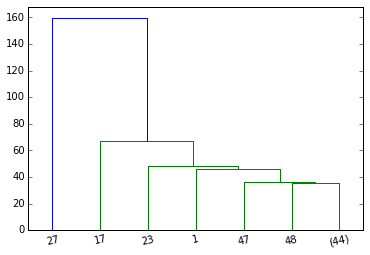

In [18]:
dendrogram(z, p=5, truncate_mode='level')

In [10]:
smaller_sample = text[:50]

In [24]:
text[40]

' In a sign of the rising export ambitions of the Chinese mobile phone industry, the smartphone maker Xiaomi said Thursday that it had hired a top executive away from Google to lead its international expansion plans, Eric Pfanner reports.The executive, Hugo Barra, is one of the highest-profile Westerners to join a Chinese technology company, analysts said.Hes a significant figure in the industry, a significant figure at Google, said Pete Cunningham, an analyst at Canalys, a research firm. It underlines the trend were seeing in the market. The Chinese vendors are going to play a big part in shaping the future of the industry. At Google, Mr. Barra has served as vice president for Googles Android mobile operating system, which is used by the vast majority of smartphones in China. Xiaomi is one of a number of Chinese smartphone makers that have been gaining market share in China against foreign rivals like Apple and Nokia. Until recently, these Chinese companies seemed happy with their ris

In [26]:
with open("my_NYTimes_data20426.pkl", 'r') as picklefile: 
    full_dataset = pickle.load(picklefile)

In [30]:
full_df = pd.DataFrame.from_dict(full_dataset, orient='index')
print len(full_df[full_df.text==''])
print len(full_df[full_df.text!=''])
re.sub("[.,?!](?=[A-Z])", ". ", full_df.ix[1].text)
has_text = full_df[full_df.text!='']

2578
17848


In [32]:
has_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17848 entries, http://6thfloor.blogs.nytimes.com/2012/01/26/a-russian-principal-sniffs-around-brooklyn/ to http://www.nytimes.com/times-insider/2015/07/30/1973-meet-donald-trump/
Data columns (total 14 columns):
headline      17848 non-null object
text          17848 non-null object
abstract      12566 non-null object
locations     17848 non-null object
word_count    16460 non-null object
id            17848 non-null object
snippet       17837 non-null object
source        17848 non-null object
subjects      17848 non-null object
url           17848 non-null object
desk          15565 non-null object
date          17848 non-null object
type          17848 non-null object
section       17676 non-null object
dtypes: object(14)
memory usage: 2.0+ MB


In [33]:
tf_vectorizer = CountVectorizer(stop_words='english', min_df=0)

In [34]:
tf = tf_vectorizer.fit_transform(has_text.text)

In [35]:
tf.toarray().shape

(17848, 156895)

In [ ]:
condensed_distance_matrix = distance.pdist(tf.toarray())